In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error , median_absolute_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# <center><font color='green'>Solar Irradiance Project</font></center>

In [3]:
import xgboost as xgb
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.models import Sequential

In [4]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\machine_learning\SolarPrediction.csv")
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
data.shape

(32686, 11)

In [6]:
data.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [7]:
df=data.copy()
df['Data']=df['Data'].apply(lambda x : x.split()[0])
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
df['month']=pd.to_datetime(df['Data']).dt.month
df['day']=pd.to_datetime(df['Data']).dt.day
df['hour']=pd.to_datetime(df['Time']).dt.hour
df['minute']=pd.to_datetime(df['Time']).dt.minute
df['second']=pd.to_datetime(df['Time']).dt.second
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15688\1024527369.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour']=pd.to_datetime(df['Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_15688\1024527369.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute']=pd.to_datetime(df['Time']).dt.minute
C:\Users\HP\AppData\Local\Temp\ipykernel_15688\1024527369.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['second']=pd.to_datetime(df['Time']).dt.second


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,hour,minute,second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [9]:
df['risehour']=pd.to_datetime(df['TimeSunRise']).dt.hour
df['riseminute']=pd.to_datetime(df['TimeSunRise']).dt.minute
df['sethour']=pd.to_datetime(df['TimeSunSet']).dt.hour
df['setminute']=pd.to_datetime(df['TimeSunSet']).dt.minute
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15688\2978411995.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['risehour']=pd.to_datetime(df['TimeSunRise']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_15688\2978411995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['riseminute']=pd.to_datetime(df['TimeSunRise']).dt.minute
C:\Users\HP\AppData\Local\Temp\ipykernel_15688\2978411995.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sethour']=pd.to_datetime(df['TimeSunSet']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_15688\2978411995.py:4: UserWarning: 

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,hour,minute,second,risehour,riseminute,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [10]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'month', 'day', 'hour', 'minute', 'second', 'risehour',
       'riseminute', 'sethour', 'setminute'],
      dtype='object')

In [11]:
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise',
       'TimeSunSet'],axis=1,inplace=True)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,risehour,riseminute,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [12]:
df.shape

(32686, 15)

In [13]:
x=df.drop(['Radiation'],axis=1)
y=df['Radiation']

In [14]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,risehour,riseminute,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   month                   32686 non-null  int32  
 7   day                     32686 non-null  int32  
 8   hour                    32686 non-null  int32  
 9   minute                  32686 non-null  int32  
 10  second                  32686 non-null  int32  
 11  risehour                32686 non-null  int32  
 12  riseminute              32686 non-null  int32  
 13  sethour                 32686 non-null  int32  
 14  setminute               32686 non-null

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


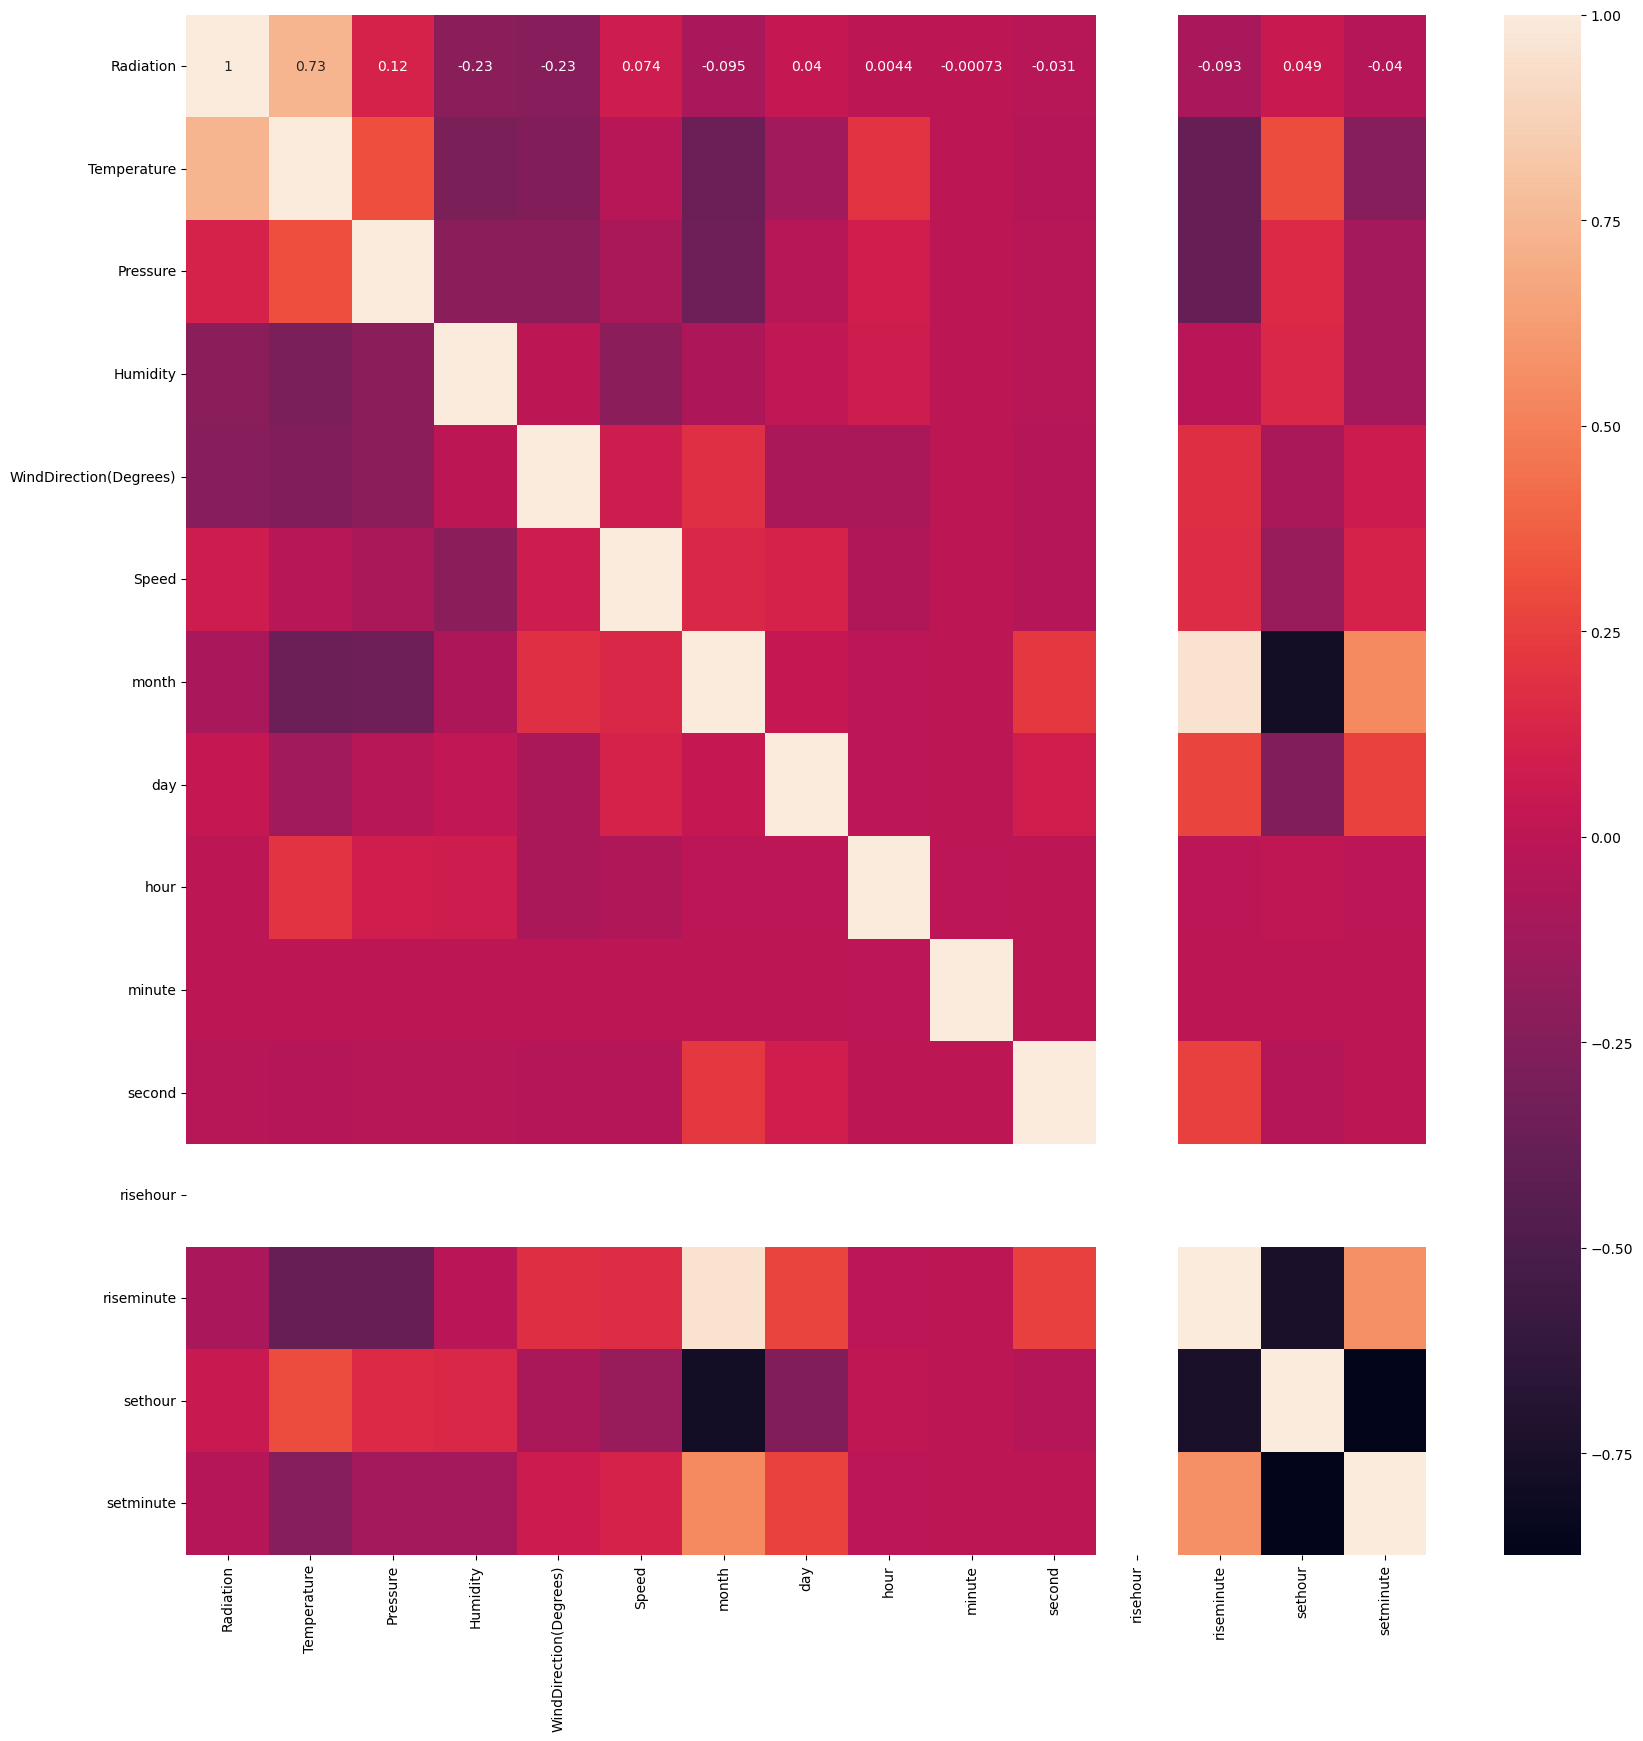

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)  # we are doing this as the fit for model does not accept continuous float values so we need to convert it to int
# or we can multiply all with 100 such that it becomes int
#like this-- df['Radiation'].apply(lambda x:int(x*100))

In [18]:
y

array([ 9,  9, 11, ...,  8, 11,  8], dtype=int64)

In [19]:
scaled_x=MinMaxScaler().fit_transform(x)
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(scaled_x,y)

In [20]:
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
featurescores=pd.concat([columns,scores],axis=1)

In [21]:
featurescores.columns=['features','feature_imp']
featurescores.sort_values(by = 'feature_imp',ascending=False,inplace=True)
featurescores

,features,feature_imp
12,sethour,12289.463887
5,month,4721.289935
11,riseminute,4044.452710
3,WindDirection(Degrees),3294.026554
6,day,2862.204099
8,minute,2728.507341
9,second,2312.419224
13,setminute,1877.276484
0,Temperature,1655.516161
2,Humidity,1600.068787


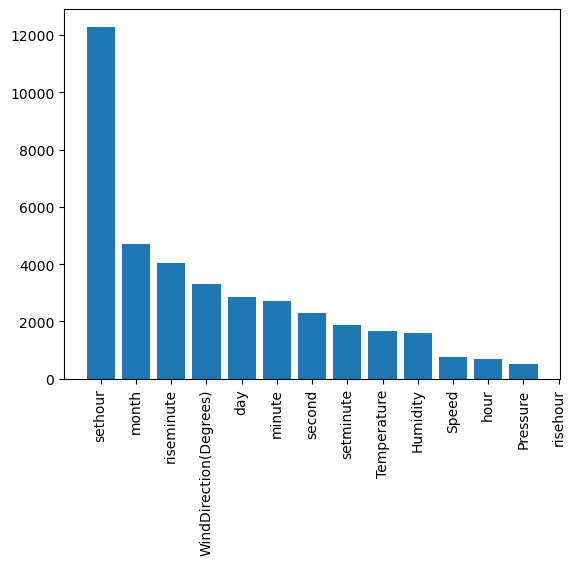

In [22]:
plt.bar(featurescores.features , featurescores.feature_imp)
plt.xticks(rotation=90)
plt.show()

### Feature Selection using ExtraTreesclassifier

In [23]:
model = ExtraTreesClassifier(verbose = 2, n_estimators = 4)
model.fit(scaled_x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 4


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s


building tree 2 of 4
building tree 3 of 4
building tree 4 of 4


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min finished


ExtraTreesClassifier(n_estimators=4, verbose=2)

In [24]:
featurescores=pd.DataFrame(model.feature_importances_,index=x.columns,columns=['feature_imp'])
featurescores.sort_values(by='feature_imp',ascending=False,inplace=True)
featurescores

,feature_imp
WindDirection(Degrees),0.159611
minute,0.148742
Speed,0.125422
second,0.123925
Humidity,0.109370
hour,0.090806
Temperature,0.083614
Pressure,0.078697
day,0.033403
setminute,0.021674


## Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


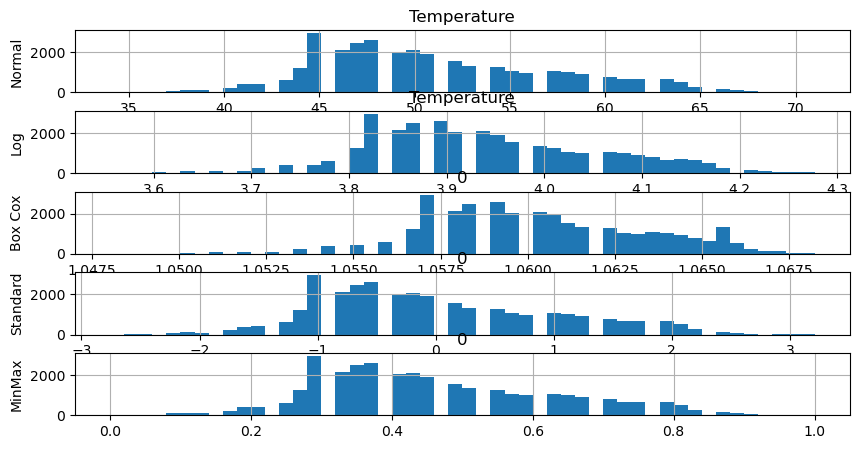

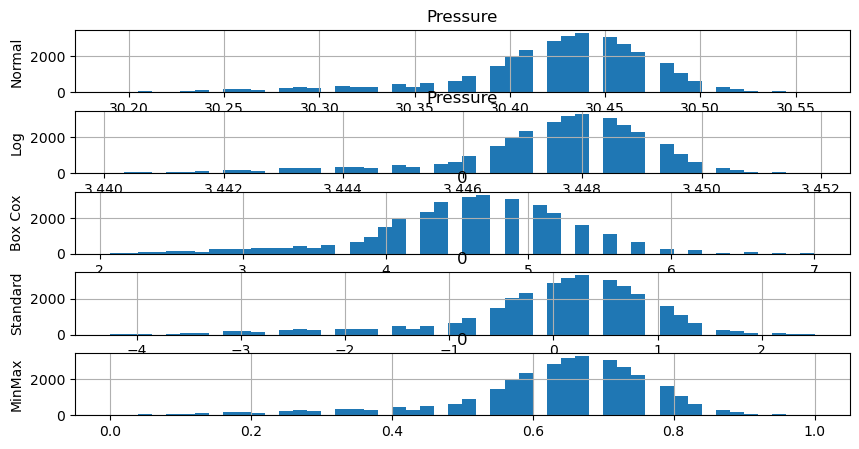

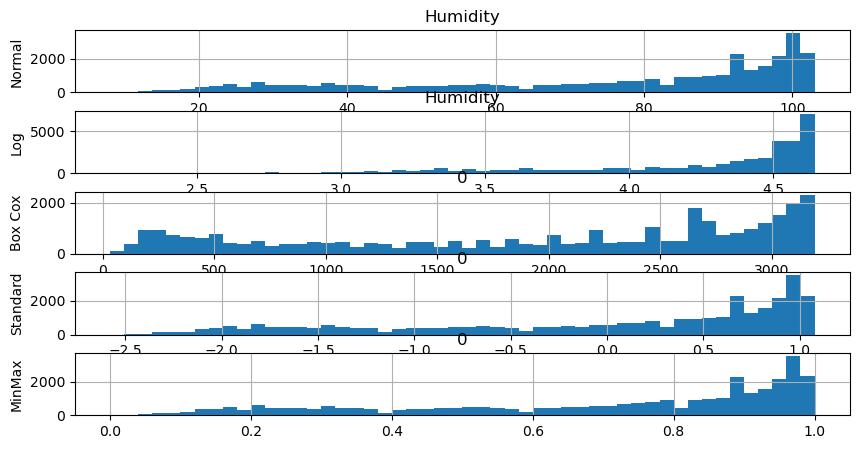

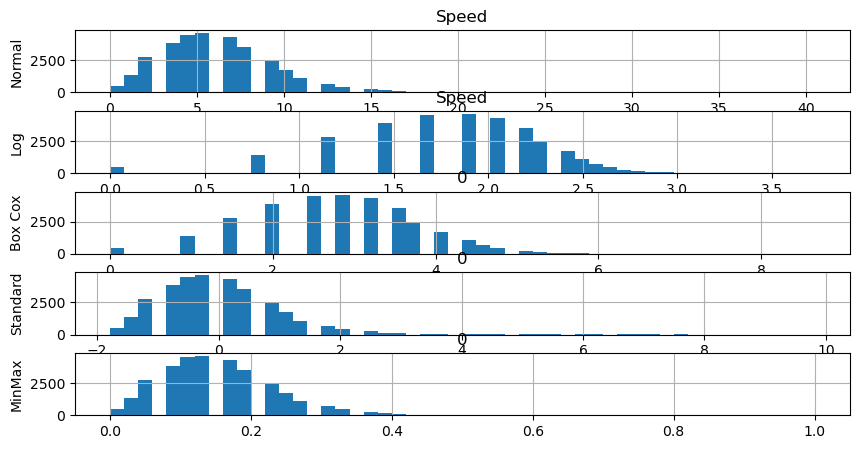

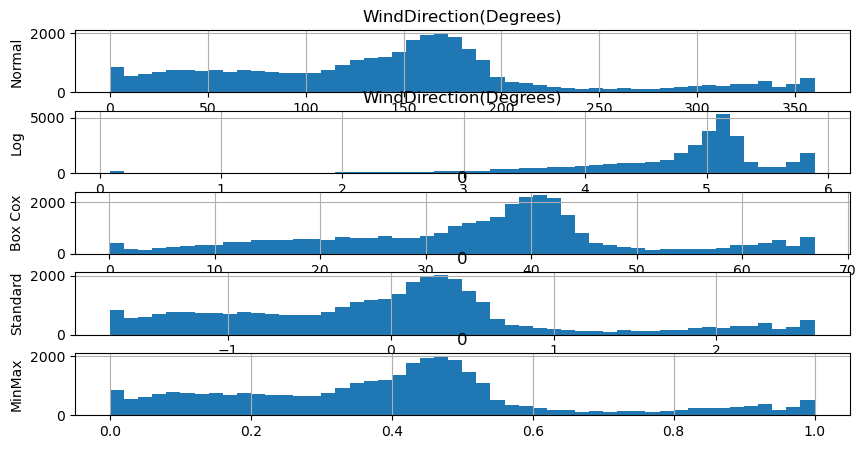

In [25]:
# Looking for transformation
from scipy import stats
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(x[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((x[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(x[i]+1)[0]).hist(ax = ax3, bins = 50)    
    pd.DataFrame(StandardScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [26]:
transform = {'Temperature' : (x['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(x['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(x['Humidity']+1)[0], 
            'Speed' : (x['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(x['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    x[i] = transform[i]
x.head()

C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,risehour,riseminute,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [28]:
print(xtrain.shape , xtest.shape)

(26148, 14) (6538, 14)


In [29]:
from xgboost import XGBRegressor
params={"learning_rate":0.1,"max_depth":8}
model=XGBRegressor(**params)

In [30]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred=model.predict(xtest)

In [32]:
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
r2=r2_score(ytest,y_pred)
print(rmse , r2)

908.1168725276538 0.9594392306714769


C:\Users\HP\AppData\Local\Temp\ipykernel_15688\312807876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-y_pred, kde=True, bins=30)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


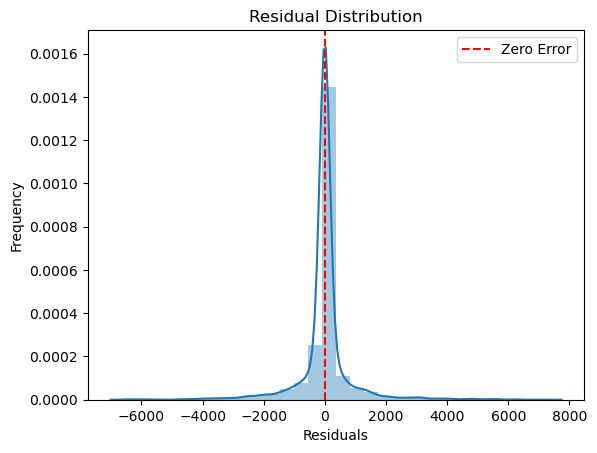

In [33]:
sns.distplot(ytest-y_pred, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


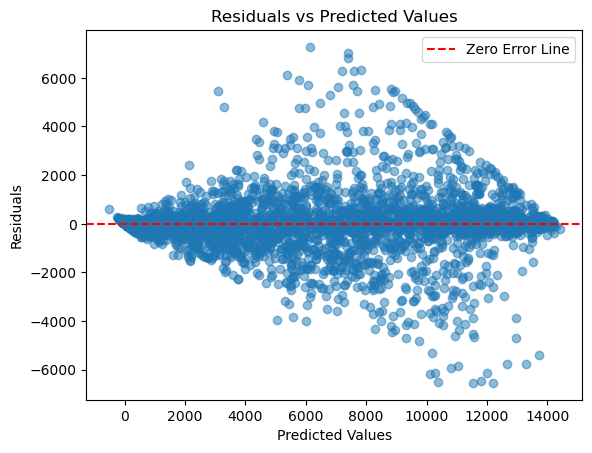

In [34]:
plt.scatter(y_pred, ytest-y_pred, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


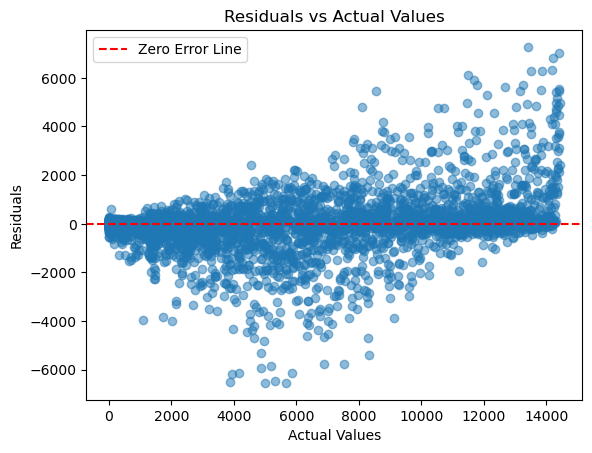

In [35]:
plt.scatter(ytest, ytest-y_pred, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()
